In [1]:
from __future__ import print_function, division

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Acquire Data

In [3]:
from sklearn.datasets import load_iris

In [4]:
# Load Iris Data
iris_data = load_iris()
features = iris_data.data  # X Matrix
target = iris_data.target  # y Target Array

# Names
feature_names = iris_data.feature_names
target_names = iris_data.target_names

In [5]:
iris_df = pd.DataFrame(features, columns=feature_names)
iris_df.rename(columns={
        "sepal length (cm)": "sepal_length",
        "sepal width (cm)": "sepal_width",
        "petal length (cm)": "petal_length",
        "petal width (cm)": "petal_width"
    }, inplace=True)
iris_df["target"] = target
iris_df["flower"] = iris_df["target"].map(lambda val: target_names[val])
iris_df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,target,flower
0,5.1,3.5,1.4,0.2,0,setosa
15,5.7,4.4,1.5,0.4,0,setosa
74,6.4,2.9,4.3,1.3,1,versicolor
106,4.9,2.5,4.5,1.7,2,virginica
118,7.7,2.6,6.9,2.3,2,virginica
3,4.6,3.1,1.5,0.2,0,setosa
143,6.8,3.2,5.9,2.3,2,virginica
30,4.8,3.1,1.6,0.2,0,setosa
57,4.9,2.4,3.3,1.0,1,versicolor
67,5.8,2.7,4.1,1.0,1,versicolor


# Explore Relationships

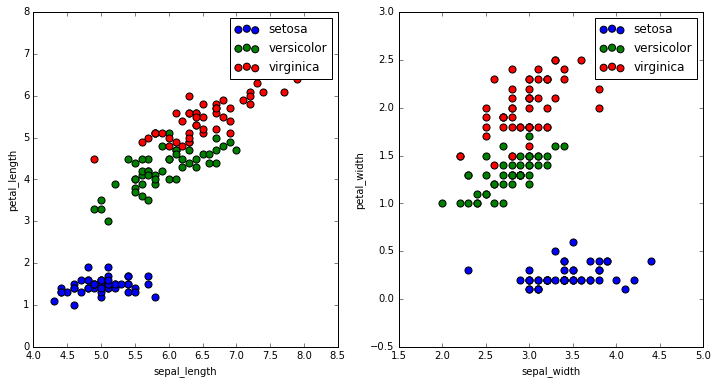

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
for idx, (x_col, y_col) in enumerate([("sepal_length", "petal_length"), ("sepal_width", "petal_width")]):
    for color, label in zip('bgr', target_names):
        subset = iris_df[iris_df.flower == label]
        ax.flat[idx].scatter(subset[x_col], subset[y_col], s=50, c=color, label=label)
        ax.flat[idx].set_xlabel(x_col)
        ax.flat[idx].set_ylabel(y_col)
        ax.flat[idx].legend()

# Build Model

In [7]:
from sklearn.grid_search import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


def build_knn(features, target, **param_grid):
    est = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=5, scoring="accuracy")
    est.fit(features, target)
    return est

In [8]:
knn_est = build_knn(features, target, n_neighbors=list(range(3, 10, 2)))

In [9]:
# Best Score
print("Best Score:", knn_est.best_score_)
print("Best Params", knn_est.best_params_)

Best Score: 0.98
Best Params {'n_neighbors': 7}


In [10]:
knn_est.grid_scores_

[mean: 0.96667, std: 0.02108, params: {'n_neighbors': 3},
 mean: 0.97333, std: 0.02494, params: {'n_neighbors': 5},
 mean: 0.98000, std: 0.01633, params: {'n_neighbors': 7},
 mean: 0.97333, std: 0.02494, params: {'n_neighbors': 9}]